### Data Notes
* Not all Days are covered, at points there are significant (5-8 week) gaps in data.
* Different Devices used to collect data may overlap times (device marked as 'UNKNOWN' in data)
* 3 different tables (I think our main focus should be on the third table that has the pump data coupled with the best of the BG tables (1 or 2))

In [170]:
import pandas as pd
import csv
import os


def load_export_csv(file_path):
    # Define the headers for each table to identify them
    table_headers = {
        'table1': ["DeviceType", "SerialNumber", "Description", "EventDateTime", "Readings (mg/dL)"],
        'table2': ["DeviceType", "SerialNumber", "Description", "EventDateTime", "BG (mg/dL)", "Note"],
        'table3': ["Type", "BolusType", "BolusDeliveryMethod", "BG (mg/dL)", "SerialNumber",
                   "CompletionDateTime", "InsulinDelivered", "FoodDelivered", "CorrectionDelivered",
                   "CompletionStatusDesc", "BolexStartDateTime", "BolexCompletionDateTime",
                   "BolexInsulinDelivered", "BolexCompletionStatusDesc", "StandardPercent",
                   "Duration (mins)", "CarbSize", "TargetBG (mg/dL)", "CorrectionFactor",
                   "CarbRatio"]
    }
    
    # Initialize data storage for each table
    data_tables = {
        'table1': [],
        'table2': [],
        'table3': []
    }
    
    current_table = None  # To keep track of which table we're currently reading
    line_number = 0  # To track line numbers for debugging
    
    with open(file_path, 'r', newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            line_number += 1
            # Strip whitespace from each cell
            row = [cell.strip() for cell in row]
            
            # Debugging: Print current row and line number
            # print(f"Line {line_number}: {row}")
            
            # Check if the row matches any table header
            if row[:len(table_headers['table1'])] == table_headers['table1']:
                current_table = 'table1'
                # print(f"Detected header for table1 at line {line_number}")
                continue  # Skip the header row
            elif row[:len(table_headers['table2'])] == table_headers['table2']:
                current_table = 'table2'
                # print(f"Detected header for table2 at line {line_number}")
                continue  # Skip the header row
            elif row[:len(table_headers['table3'])] == table_headers['table3']:
                current_table = 'table3'
                # print(f"Detected header for table3 at line {line_number}")
                continue  # Skip the header row
            elif not any(cell for cell in row):
                # Empty row signifies possible separation; skip
                current_table = None
                # print(f"Detected empty row at line {line_number}; resetting current_table")
                continue
            
            # If current_table is set, append the row to the corresponding data list
            if current_table:
                expected_columns = len(table_headers[current_table])
                actual_columns = len(row)
                
                if actual_columns != expected_columns:
                    print(f"Warning: Line {line_number} has {actual_columns} columns, expected {expected_columns}. Skipping row.")
                    continue  # Skip rows that don't match the expected column count
                
                # Replace '(Data)' placeholders with actual data if necessary
                cleaned_row = [cell if cell != '(Data)' else None for cell in row]
                data_tables[current_table].append(cleaned_row)
            else:
                # Rows outside of any table headers are ignored
                print(f"Warning: Line {line_number} is outside of any table. Skipping row.")
                continue
    
    # Convert lists to DataFrames with appropriate columns
    df_tables = {}
    for table_key, data in data_tables.items():
        if data:  # Only create DataFrame if there's data
            df = pd.DataFrame(data, columns=table_headers[table_key])
            df_tables[table_key] = df
        else:
            df_tables[table_key] = pd.DataFrame(columns=table_headers[table_key])
    
    return df_tables['table1'], df_tables['table2'], df_tables['table3']



file_path = './Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1920-2.csv'  
df_table1, df_table2, df_table3 = load_export_csv(file_path)

# Display the DataFrames
print("Table 1 DataFrame:")
print(df_table1.head())

print("\nTable 2 DataFrame:")
print(df_table2.head())

print("\nTable 3 DataFrame:")
print(df_table3.head())

# Optionally, save the DataFrames to separate CSV files
df_table1.to_csv(os.path.join('./DataTables', 'table_1.csv'), index=False)
df_table2.to_csv(os.path.join('./DataTables', 'table_2.csv'), index=False)
df_table3.to_csv(os.path.join('./DataTables', 'table_3.csv'), index=False)


Table 1 DataFrame:
  DeviceType SerialNumber Description        EventDateTime Readings (mg/dL)
0    Unknown       870772         EGV  2023-03-01T00:00:55              174
1    Unknown       870772         EGV  2023-03-01T00:05:55              172
2    Unknown       870772         EGV  2023-03-01T00:10:55              171
3    Unknown       870772         EGV  2023-03-01T00:15:55              168
4    Unknown       870772         EGV  2023-03-01T00:20:55              165

Table 2 DataFrame:
  DeviceType SerialNumber Description        EventDateTime BG (mg/dL) Note
0    Unknown       870772          BG  2023-03-01T16:07:59        238     
1    Unknown       870772          BG  2023-03-01T18:04:52        382     
2    Unknown       870772          BG  2023-03-01T20:09:14        156     
3    Unknown       870772          BG  2023-03-01T20:31:14        248     
4    Unknown       870772          BG  2023-03-02T12:46:15        157     

Table 3 DataFrame:
    Type BolusType BolusDeliveryMet

In [171]:
import glob

def gather_csv_files(main_directory):
    """
    Gathers all CSV files from subdirectories (2022PumpData, 2023PumpData, 2024PumpData)
    in the 'data' directory located in the main directory.

    Parameters:
        main_directory (str): The path to the main directory.

    Returns:
        list: A list of paths to all CSV files found in the specified subdirectories.
    """
    # Define the parent directory
    parent_directory = os.path.join(main_directory, 'Data')
    
    # List of subdirectories to search
    subdirectories = ['2022PumpData', '2023PumpData', '2024PumpData']
    
    # Collect CSV files from all subdirectories
    csv_files = []
    for subdir in subdirectories:
        subdir_path = os.path.join(parent_directory, subdir)
        print(subdir_path)
        csv_files.extend(glob.glob(os.path.join(subdir_path, '*.csv')))
    
    return csv_files

# Usage example
main_directory = './'  # Replace with the path to your main directory
csv_files = gather_csv_files(main_directory)

# Print the gathered CSV file paths
for file in csv_files:
    print(file)


./Data/2022PumpData
./Data/2023PumpData
./Data/2024PumpData
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1916.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1917-2.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1917.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1910.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1908.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1916-2.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1918.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1912.csv
./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1914.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1924-3.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1923.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1924.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1922-2.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1920-2.csv
./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1921-2.csv
./Data/2023Pu

In [172]:

def process_all_csv_files_combined(main_directory, output_directory):
    """
    Processes all CSV files in the 'Data/2022PumpData', 'Data/2023PumpData', and 'Data/2024PumpData'
    subdirectories, extracting tables and appending them into combined CSV files.

    Parameters:
        main_directory (str): The path to the main directory containing the 'Data' folder.
        output_directory (str): The path to the directory where combined tables will be saved.

    Returns:
        None
    """
    # Gather all CSV files
    csv_files = gather_csv_files(main_directory)

    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)

    # Initialize empty DataFrames for combined output
    combined_table1 = pd.DataFrame()
    combined_table2 = pd.DataFrame()
    combined_table3 = pd.DataFrame()

    for file_path in csv_files:
        print(f"Processing file: {file_path}")
        
        try:
            # Load the CSV file and extract tables
            df_table1, df_table2, df_table3 = load_export_csv(file_path)
            
            # Append each table to its respective combined DataFrame
            combined_table1 = pd.concat([combined_table1, df_table1], ignore_index=True)
            combined_table2 = pd.concat([combined_table2, df_table2], ignore_index=True)
            combined_table3 = pd.concat([combined_table3, df_table3], ignore_index=True)
        
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

    # Define output file paths
    table1_file = os.path.join(output_directory, 'EVG.csv')
    table2_file = os.path.join(output_directory, 'BG.csv')
    table3_file = os.path.join(output_directory, 'Bolus.csv')

    # Save the combined tables to CSV
    combined_table1.to_csv(table1_file, index=False)
    combined_table2.to_csv(table2_file, index=False)
    combined_table3.to_csv(table3_file, index=False)

    print(f"Combined tables saved to: {output_directory}")


# Usage example
main_directory = './'  # Replace with the path to your main directory
output_directory = './DataTables'  # Replace with your desired output directory

process_all_csv_files_combined(main_directory, output_directory)


./Data/2022PumpData
./Data/2023PumpData
./Data/2024PumpData
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1916.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1917-2.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1917.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1910.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1908.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1916-2.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1918.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1912.csv
Processing file: ./Data/2022PumpData/CSV_redacted_90945369_02Dec2024_1914.csv
Processing file: ./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1924-3.csv
Processing file: ./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1923.csv
Processing file: ./Data/2023PumpData/CSV_redacted_90945369_02Dec2024_1924.cs

In [173]:
import matplotlib as plt
import numpy as np

# Functions
def create_relative_time_minutes(dataframe):
    """
    Creates a new column in the dataframe which records in minutes the time since the earliest date in the dataset.

    Parameters:
        dataframe: The pandas dataframe that will be modified. Must have an 'EventDateTime' column.

    Returns:
        dataframe: The modified pandas dataframe
    """
    oldest_date = (pd.to_datetime(dataframe['EventDateTime']).dt.date).min()
    dataframe['MinutesSinceStart'] = ((pd.to_datetime(dataframe['EventDateTime']).dt.date - oldest_date) / np.timedelta64(1, 'm'))
    dataframe['MinutesSinceStart'] = dataframe['MinutesSinceStart'].astype(int)
    return dataframe

def sort_by_relative_time(dataframe):
    dataframe = dataframe.sort_values(by='MinutesSinceStart')
    return dataframe

In [174]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

NaN values: False


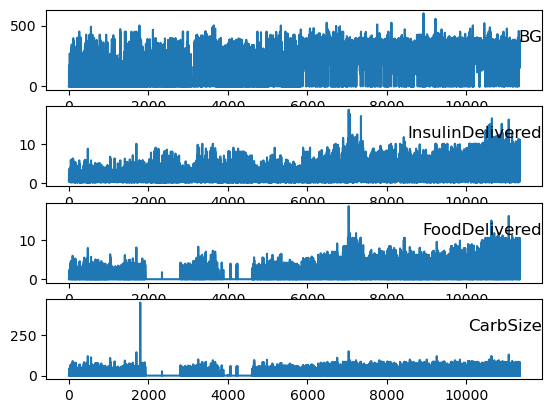

       var1(t-24)  var2(t-24)  var3(t-24)  var4(t-24)  var1(t-23)  var2(t-23)  \
24            0.0        0.67        0.00         0.0         0.0        1.64   
25            0.0        1.64        0.00         0.0         0.0        0.34   
26            0.0        0.34        0.00         0.0       139.0        3.50   
27          139.0        3.50        0.00         0.0         0.0        0.84   
28            0.0        0.84        0.00         0.0         0.0        0.67   
...           ...         ...         ...         ...         ...         ...   
11343       165.0        8.12        8.12        65.0       316.0        0.35   
11344       316.0        0.35        0.00         0.0       455.0        3.91   
11345       455.0        3.91        0.00         0.0         0.0        8.75   
11346         0.0        8.75        0.00         0.0         0.0        8.12   
11347         0.0        8.12        8.12        65.0         0.0        9.00   

       var3(t-23)  var4(t-2

In [ ]:
import matplotlib as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import sklearn.preprocessing as skl

'''
The first step in performing a Time Series analysis is visualizing our data over the entire course of time it was collected.
This will help us understand the four principle components of a Time Series (Trend, Seasonality, Cycle, and Variation / Noise).
Because this data represents someone's blood-glucose levels over time, we expect there to be a relatively flat trend. However, we need to discover seasonality, cycle(s), and noise.
'''

## Load Bolus Data
file_path = './DataTables/Bolus.csv'
df = pd.read_csv(file_path)
df['CompletionDateTime'] = pd.to_datetime(df['CompletionDateTime'])

## Prepare and Clean Data
df = df[["BG (mg/dL)", "CompletionDateTime", "InsulinDelivered", "FoodDelivered", "CarbSize"]]
# Check for NaN values; there are none
print("NaN values:", df.isnull().values.any())
# Organize data, make date into an index
df.columns = ["BG", "Date", "InsulinDelivered", "FoodDelivered", "CarbSize"]
columns_titles = ["Date", "BG", "InsulinDelivered", "FoodDelivered", "CarbSize"]
df = df.reindex(columns=columns_titles)
df.set_index("Date", inplace=True)
# Note: we are not using any categorical data
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
plt.pyplot.figure()
for group in groups:
	plt.pyplot.subplot(len(groups), 1, i)
	plt.pyplot.plot(values[:, group])
	plt.pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.pyplot.show()
# normalize features
scaler = skl.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
df.head()

data = series_to_supervised(df.values,n_in=24,n_out=1)
print(data)
#df_Bg = df_Bg.iloc[:, 3:5]
#df_Bg.groupby(df_Bg['CompletionDateTime'].dt.hour)['CorrectionDelivered'].mean().plot( kind='bar', rot=0 )
#filter = (df_Bg['CompletionDateTime'] > '2024-8') & (df_Bg['CompletionDateTime'] < '2024-11')
#print(df_Bg.head())

#ax = df_Bg.loc[filter].plot.line(x='CompletionDateTime', y='BG (mg/dL)', rot=0, legend=False, figsize=(20,10))
#ax.set_xlabel("Date")
#ax.set_ylabel("Blood-Glucose Level (mg/dL)")
#ax.set_xbound(lower=pd.Timestamp('2024-01-1 00:00:00'), upper=None)

Note: if data too noisy, expand the time range that you are predicting. For ex: predict BG over the course of a week instead of a few hours

**NATE**: Apologies for the small amount of code, but I spent tonight doing a lot of research on Time Series, Pandas' implementation of it, and also the type of machine learning model the professor recommended us to use. He recommended using a type of Neural Network called a "Recurrent Neural Network" or RNN. Essentially the idea is this; imagine someone hands you a picture of a cube (no background or anything) and asks you to predict which way it will go next. Obviously you'll just be guessing. But if someone handed you a sequence of pictures of the cube over time, you could take a reasonable guess. This applies to an RNN. The point of an RNN is that it keeps track of previous states, just like the sequence of pictures of the cube. That way, it can make better predictions. However, RNNs suffer from very short-term memory. So, there are more advanced ones called Long-Short Term Memory models or LSTMs. Sufficed to say, they somehow fix the issue somewhat. Anyway, we need this since we have long time periods and also because we want to be able to predict based on the last few hours of information, like getting data from the last 24 hours before making a prediction of BG level. So, I've been following this tutorial (https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/). I'm about halfway through. After it's done, We will do a bunch of hyper parameter tweaks, etc. Rn, the input into the model is gonna be the last 24 hours of BG levels, InsulinDelivered, FoodDelivered, and CarbSize. We can also tweek the amount of hours back the data goes to adjust the accuracy of the model. Anyway, give me any feedback you have, and lemmino if you think there are better input variables. The ones I just listed just seemed the most usable to me because none are categorical and they are within the Bolus dataset which has a ton of entries. Plus they seem intuitively like decent predictors. Anyway, text me anything about it. This should be mostly done by tonight (12/5/24).